In [1]:
import os
import sys

In [2]:
home = os.environ['HOME']
work_path = os.path.join(home, 'far/farTeach/2026/weak')
src_path = os.path.join(home, 'far/PHARE')
build_path = os.path.join(home, 'far/builds/release/ufunc')

In [3]:
sys.path.append(os.path.join(src_path, "pyphare"))

In [4]:
import subprocess
import pyphare
import matplotlib.pyplot as plt
from pyphare.pharesee.run import Run
import numpy as np

In [5]:
Ti = 0.02
Te = 0.1
run_name = "wpc"

In [6]:
run_path = os.path.join(work_path, run_name)

In [7]:
if os.path.isdir(run_path):
    files = os.listdir(run_path)
else:
    files = []

In [8]:
if 'PYTHONPATH' in os.environ:
    os.environ['PYTHONPATH'] += os.pathsep + os.path.join(src_path, "pyphare")
else:
    os.environ['PYTHONPATH'] = os.pathsep + os.path.join(src_path, "pyphare")
os.environ['PYTHONPATH'] += os.pathsep + build_path

In [9]:
if 'ions_charge_density.h5' not in files :
    os.chdir(work_path)
    subprocess.run(['mpirun', '-n', '2', '/usr/bin/python3', work_path+'/wp.py', run_name, str(Te), str(Ti)], env=os.environ)

In [10]:
run  = Run(run_path)

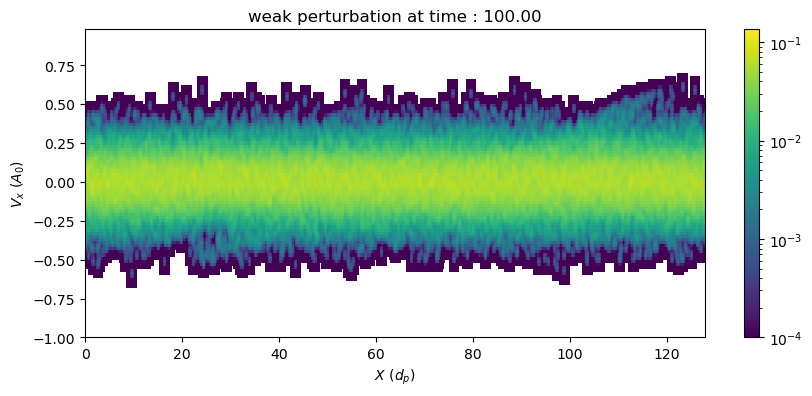

In [11]:
time=100
r = Run(run_path)
ions = r.GetParticles(time, ["protons",])

fig, ax = plt.subplots(figsize=(10,4))

p,f = ions.dist_plot(axis=("x", "Vx"),
                     ax=ax,
                     norm=0.4,
                     finest=True,
                     cmap="viridis",
                     gaussian_filter_sigma=1,
                     vmin=-1,vmax=1,
                     dv=0.02,
                     xlabel="$X \\ (d_p)$",
                     ylabel="$V_x \\ (A_0)$",
                     title="weak perturbation at time : {:.2f}".format(time),
                    )

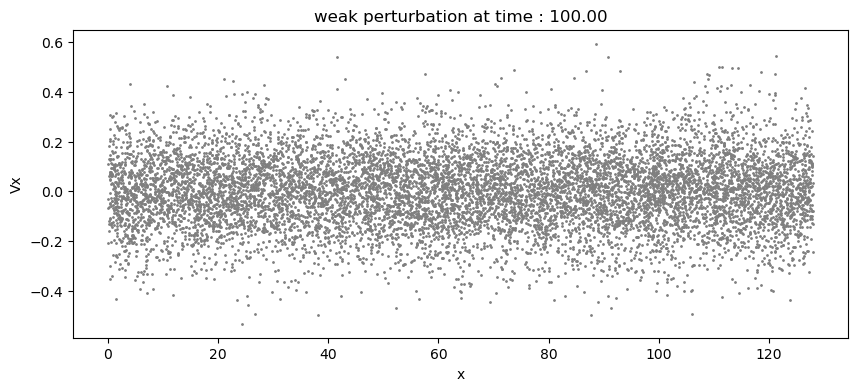

In [20]:
time=100
r = Run(run_path)
ions = r.GetParticles(time, ["protons",])

fig, ax = plt.subplots(figsize=(10,4))

p,f = ions.dist_plot(axis=("x", "Vx"),
                     ax=ax,
                     norm = 0.4,
                     finest=True,
                     plain=True,
                     stride=10,
                     color='tab:gray',
                     alpha=1,
                     markersize=2,
                     vmin=-1,vmax=1,
                     title="weak perturbation at time : {:.2f}".format(time),
                    )

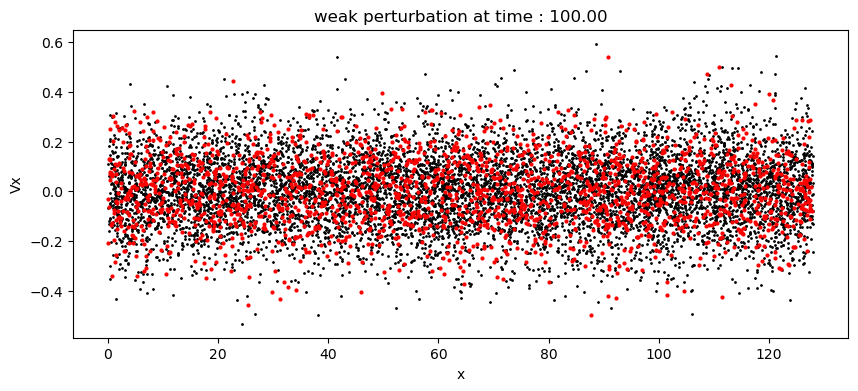

In [13]:
time=100
r = Run(run_path)
ions = r.GetParticles(time, ["protons",])
protons = r.GetParticles(time, ["protons",])

fig, ax = plt.subplots(figsize=(10,4))

p,f = ions.dist_plot(axis=("x", "Vx"),
                     ax=ax,
                     norm = 0.4,
                     finest=True,
                     plain=True,
                     stride=10,
                     color='k',
                     alpha=1,
                     markersize=2,
                     gaussian_filter_sigma=1,
                     vmin=-1,vmax=1,
                     dv=0.01,
                    )

p, f = protons.dist_plot(axis=("x", "Vx"),
                         ax=ax,
                         plain=True,
                         stride=50,
                         color='r',
                         alpha=1,
                         markersize=4,
                         title="weak perturbation at time : {:.2f}".format(time),
                        )

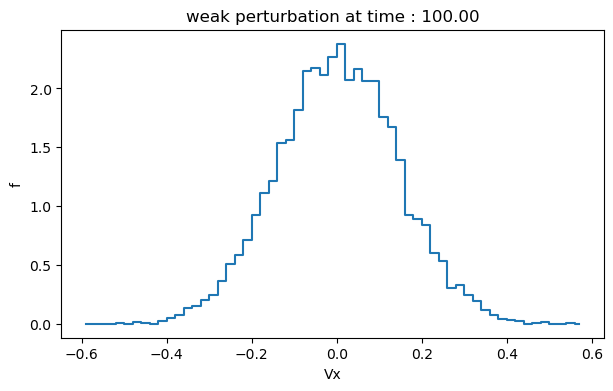

In [14]:
time=100
r = Run(run_path)
ions = r.GetParticles(time, ["protons",])

fig, ax = plt.subplots(figsize=(7,4))

p,(f, a) = ions.dist_plot(axis=("Vx",),
                          # drawstyle="default",
                          ax=ax,
                          finest=True,
                          cuts=((40, 80),),
                          vmin=-0.6,vmax=0.6,
                          dv=0.02,
                          title="weak perturbation at time : {:.2f}".format(time),
                         )

In [15]:
from pyphare.pharesee.hierarchy.hierarchy import amr_grid

x_grid = amr_grid(ions, time)
x_slice = (10.4, 11.2)

i_slice = (int(np.abs(x_grid - x_slice[0]).argmin()), int(np.abs(x_grid - x_slice[1]).argmin()))
print(i_slice)

(42, 45)


In [16]:
from pyphare.core.box import Box

boxe = Box((0,), (1,))  # avec des index AMR
boxe = Box(*i_slice)

In [17]:
# slice_p = ions.select(boxe)

In [18]:
len((1,3))

2

In [19]:
titi=(0,2)
range(*titi)

range(0, 2)